# Practical Session #4: Part 1

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Problem 1
- Implement a perceptron and the learning algorithm in Python, using
the Python code `template_MLP.py`.
- Train it on the Iris Plant dataset using the first 100 examples
(corresponding to classes Iris-setosa and Iris-versicolor) and using
as input features the sepal length (first column) and the petal length
(third column).

In [22]:
# Iris dataset

datas_iris = pd.read_csv('Datasets/iris_proc.data')
# sepal length / sepal width / petal length / petal width / class

datas_iris.head()

,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


## Problem 2
- Study the python code `template_LogReg.py` where a logistic
regression is used on the Social Network dataset, by taking into
account the age and estimated salary to predict the output.
- Apply a logistic regression on the Pima Indians Diabetes and on the
Iris Plant dataset.

In [23]:
def drawClasses(X_set, y_set, c1, c2, title_name, x_label, y_label, classes, classifier=None):
    from matplotlib.colors import ListedColormap
    plt.figure()
    #    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, c1].min() - 1, stop=X_set[:, c1].max() + 1, step=0.01),
                         np.arange(start=X_set[:, c2].min() - 1, stop=X_set[:, c2].max() + 1, step=0.01))
    if classifier is not None:
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha=0.25, cmap=ListedColormap(classes))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(classes)(i), label=j)
    plt.title('Classifier ({})'.format(title_name))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [24]:
# Indians

datas = pd.read_csv('Datasets/pima-indians-diabetes.data')
# Pregnancies / Glucose / BloodPressure / SkinThickness / Insulin / BMI / DiabetesPedigreeFunction / Age / Outcome

datas.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [25]:
X = datas.iloc[:, [1, 5]]
y = datas.iloc[:, -1]

print(X)
print(y)

     148  33.6
0     85  26.6
1    183  23.3
2     89  28.1
3    137  43.1
4    116  25.6
..   ...   ...
762  101  32.9
763  122  36.8
764  121  26.2
765  126  30.1
766   93  30.4

[767 rows x 2 columns]
0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: 1, Length: 767, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[120  11]
 [ 28  33]]


/var/folders/c6/dvmqz81j59g3qs_b7r4gm6640000gn/T/ipykernel_4679/622496047.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


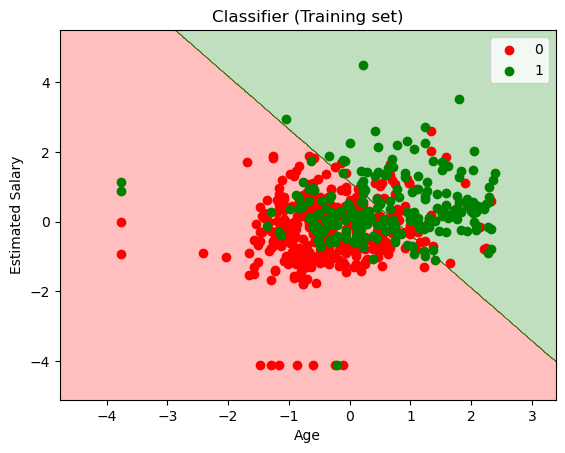

/var/folders/c6/dvmqz81j59g3qs_b7r4gm6640000gn/T/ipykernel_4679/622496047.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


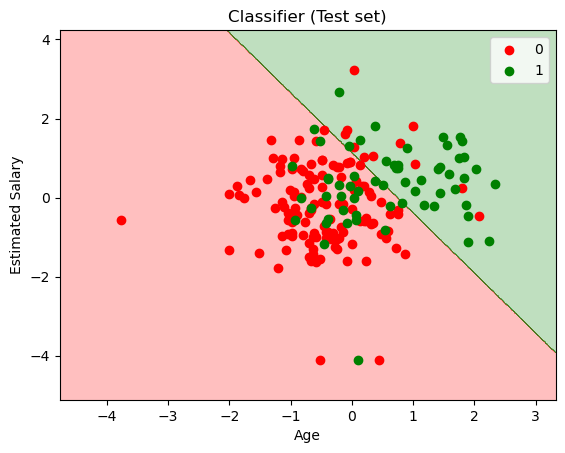

In [29]:
classes = ('red', 'green')

drawClasses(X_train, y_train, 0, 1, 'Training set', 'Age', 'Estimated Salary', classes, classifier)
drawClasses(X_test, y_test, 0, 1, 'Test set', 'Age', 'Estimated Salary', classes, classifier)

In [30]:
# Iris dataset

datas_iris = pd.read_csv('Datasets/iris_proc.data')
# sepal length / sepal width / petal length / petal width / class

datas_iris.head()

,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [31]:
X_iris = datas_iris.iloc[:, [0, 2]]
y_iris = datas_iris.iloc[:, -1]

print(X_iris)
print(y_iris)

     5.1  1.4
0    4.9  1.4
1    4.7  1.3
2    4.6  1.5
3    5.0  1.4
4    5.4  1.7
..   ...  ...
144  6.7  5.2
145  6.3  5.0
146  6.5  5.2
147  6.2  5.4
148  5.9  5.1

[149 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: 0, Length: 149, dtype: int64


In [32]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25, random_state=0)

sc_iris = StandardScaler()
X_train_iris = sc_iris.fit_transform(X_train_iris)
X_test_iris = sc_iris.transform(X_test_iris)

In [33]:
classifier_iris = LogisticRegression(random_state=0)
classifier_iris.fit(X_train_iris, y_train_iris)

y_pred_iris = classifier_iris.predict(X_test_iris)

In [34]:
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
print(cm_iris)

[[14  0  0]
 [ 1 13  0]
 [ 0  1  9]]


/var/folders/c6/dvmqz81j59g3qs_b7r4gm6640000gn/T/ipykernel_4679/622496047.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


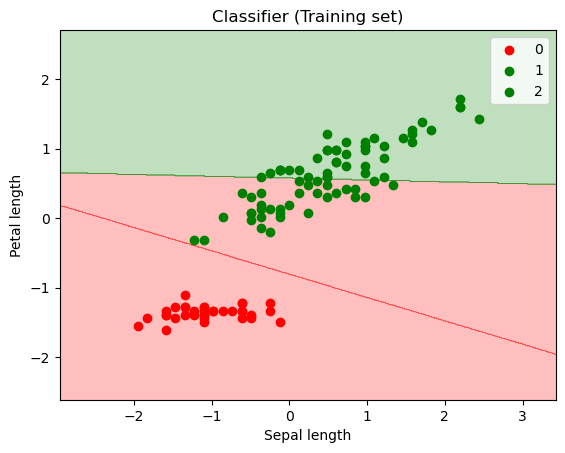

/var/folders/c6/dvmqz81j59g3qs_b7r4gm6640000gn/T/ipykernel_4679/622496047.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


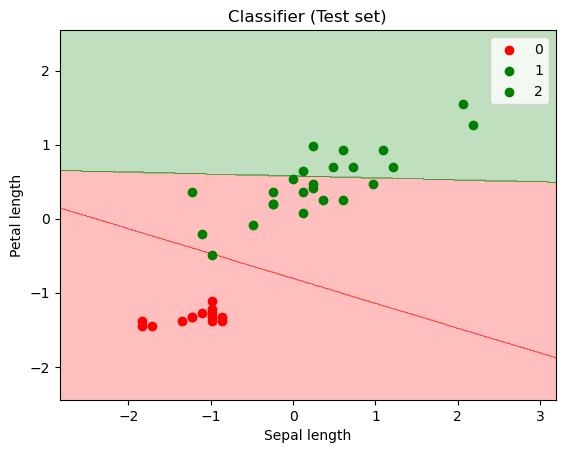

In [35]:
classes_iris = ('red', 'green')

drawClasses(X_train_iris, y_train_iris, 0, 1, 'Training set', 'Sepal length', 'Petal length', classes_iris,
            classifier_iris)
drawClasses(X_test_iris, y_test_iris, 0, 1, 'Test set', 'Sepal length', 'Petal length', classes_iris, classifier_iris)

## Problem 3
- Study the python code `template_ANN.py` where an ANN is applied on the Churn Modelling dataset.
  Used architecture: ((6,'relu'),(6,'relu'),(1,'sigmoid'))
- With the trained ANN, predict the result for this person:
  - Geography: France
  - Credit Score: 600
  - Gender: Male
  - Age: 40
  - Tenure: 3
  - Balance: 60000
  - Number of Products: 2
  - Has Credit Card: Yes
  - Is Active Member: Yes
  - Estimated Salary: 50000

In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the data, encoding, splitting the dataset and scaling

In [37]:
# Importing the dataset
dataset = pd.read_csv('../Datasets/Churn_Modelling.csv')
nb_dims=dataset.shape[1]
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

# SKLearn >=0.22
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer([("Geography",OneHotEncoder(),[1])], remainder='passthrough')
X = onehotencoder.fit_transform(X)

X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Defining the ANN and learning

In [38]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

2023-10-17 18:03:34.141486: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-17 18:03:34.141513: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-17 18:03:34.141519: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-17 18:03:34.141933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-17 18:03:34.142177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-10-17 18:03:35.266885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 9s 7ms/step - loss: 0.4828 - accuracy: 0.8027
Epoch 2/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4363 - accuracy: 0.8049
Epoch 3/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4388 - accuracy: 0.8001
Epoch 4/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4386 - accuracy: 0.8023
Epoch 5/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4379 - accuracy: 0.8005
Epoch 6/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4368 - accuracy: 0.8031
Epoch 7/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4356 - accuracy: 0.8023
Epoch 8/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4353 - accuracy: 0.8024
Epoch 9/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4346 - accuracy: 0.8035
Epoch 10/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4334 - accuracy: 0.8050
E

Predictions

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

 1/63 [..............................] - ETA: 14s

2023-10-17 18:12:49.148395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 5ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]
[[1472  123]
 [ 316   89]]


In [40]:
# Predicting a single new observation

new_prediction = classifier.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

print(new_prediction[0][0])

1/1 [==============================] - 1s 603ms/step
False


## Problem 4 (bonus)
Apply an ANN on the Pima Indians Diabetes dataset.